<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/Class_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]
!pip install shap
!pip install pyyaml==5.4.1

In [ ]:
"""
    Import library
"""
##-- PyCaret
import pycaret
from pycaret.classification import *
##-- Pandas
import pandas as pd
from pandas import Series, DataFrame
##-- Scikit-learn
import sklearn
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
url = 'https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/1_3class.csv'
# load the dataset
df = pd.read_csv(url)

In [ ]:
df

,HI,PGA,Vmax/amax,ASI,TSIGN,TBRAC,PP,CAV,SED,TUD,EPA,PGV,PGD,Ia,Htot,ecc_tot,Vw1,Vw2,class_3
0,34.69682,0.10302,0.12855,0.08556,18.66689,0.90507,0.24819,304.31962,440.05088,0.27157,0.08422,12.99187,9.37782,0.10914,9.6,0.00,0.00,0.00,A
1,112.31037,0.27556,0.10762,0.21103,20.29793,23.67931,0.40150,1097.23440,1376.04044,6.44857,0.21040,29.09237,9.60392,1.15625,9.6,0.00,0.00,0.00,C
2,54.36072,0.05061,0.25662,0.03496,44.63999,0.00000,1.09836,650.61521,786.00185,0.00000,0.03481,12.74285,11.32263,0.16481,9.6,0.00,0.00,0.00,A
3,49.97794,0.04931,0.24211,0.04257,27.66725,0.00000,1.03692,436.01942,518.85313,0.00000,0.04197,11.71184,5.70295,0.11592,9.6,0.00,0.00,0.00,A
4,145.98159,0.20528,0.17819,0.16116,14.28378,16.20496,0.96125,821.97453,3157.48763,5.02018,0.16156,35.88232,19.61064,0.89886,9.6,0.00,0.00,0.00,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,143.41546,0.30391,0.15066,0.23337,17.78367,17.44298,0.31812,882.93392,2651.05629,4.46360,0.23216,44.91805,18.90485,0.84282,22.4,5.96,0.59,0.67,C
1946,103.75376,0.19884,0.14020,0.21175,17.96602,21.21437,0.24739,1010.06525,2377.47394,6.33191,0.21011,27.34765,15.81769,0.96861,22.4,5.96,0.59,0.67,C
1947,68.04170,0.27918,0.06489,0.22260,14.30854,13.46066,0.21909,732.61930,487.70115,3.96085,0.22266,17.77163,3.81008,0.69162,22.4,5.96,0.59,0.67,B
1948,113.34270,0.38092,0.08905,0.37023,9.06208,11.58757,0.27713,1037.34587,1904.84573,5.50291,0.36474,33.27574,18.33504,1.67123,22.4,5.96,0.59,0.67,C


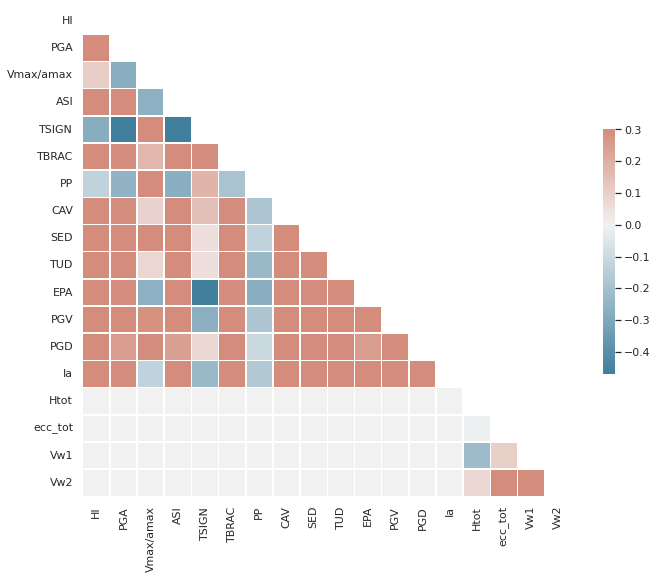

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
# setup the dataset
grid = setup(data=df, target=df.columns[-1], html=False, silent=True, verbose=False)

In [ ]:
best = compare_models(cross_validation=True, n_select = 1, turbo=False) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047
nb,Naive Bayes,0.7361,0.9226,0.7461,0.7925,0.7478,0.6025,0.6178,0.022


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047
nb,Naive Bayes,0.7361,0.9226,0.7461,0.7925,0.7478,0.6025,0.6178,0.022


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047
nb,Naive Bayes,0.7361,0.9226,0.7461,0.7925,0.7478,0.6025,0.6178,0.022
svm,SVM - Linear Kernel,0.6731,0.0000,0.5737,0.5917,0.6005,0.4338,0.5057,0.064


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rbfsvm,SVM - Radial Kernel,0.8467,0.9345,0.8142,0.8454,0.8441,0.7545,0.7563,0.409
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047
nb,Naive Bayes,0.7361,0.9226,0.7461,0.7925,0.7478,0.6025,0.6178,0.022
svm,SVM - Linear Kernel,0.6731,0.0000,0.5737,0.5917,0.6005,0.4338,0.5057,0.064


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rbfsvm,SVM - Radial Kernel,0.8467,0.9345,0.8142,0.8454,0.8441,0.7545,0.7563,0.409
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
gpc,Gaussian Process Classifier,0.8402,0.9200,0.8164,0.8422,0.8396,0.7459,0.7472,2.836
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047
nb,Naive Bayes,0.7361,0.9226,0.7461,0.7925,0.7478,0.6025,0.6178,0.022
svm,SVM - Linear Kernel,0.6731,0.0000,0.5737,0.5917,0.6005,0.4338,0.5057,0.064


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rbfsvm,SVM - Radial Kernel,0.8467,0.9345,0.8142,0.8454,0.8441,0.7545,0.7563,0.409
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
gpc,Gaussian Process Classifier,0.8402,0.9200,0.8164,0.8422,0.8396,0.7459,0.7472,2.836
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047
mlp,MLP Classifier,0.7390,0.9061,0.7419,0.7872,0.7376,0.6022,0.6245,0.374
nb,Naive Bayes,0.7361,0.9226,0.7461,0.7925,0.7478,0.6025,0.6178,0.022
svm,SVM - Linear Kernel,0.6731,0.0000,0.5737,0.5917,0.6005,0.4338,0.5057,0.064


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rbfsvm,SVM - Radial Kernel,0.8467,0.9345,0.8142,0.8454,0.8441,0.7545,0.7563,0.409
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
gpc,Gaussian Process Classifier,0.8402,0.9200,0.8164,0.8422,0.8396,0.7459,0.7472,2.836
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047
ridge,Ridge Classifier,0.8028,0.0000,0.7384,0.7900,0.7774,0.6772,0.6907,0.023
mlp,MLP Classifier,0.7390,0.9061,0.7419,0.7872,0.7376,0.6022,0.6245,0.374
nb,Naive Bayes,0.7361,0.9226,0.7461,0.7925,0.7478,0.6025,0.6178,0.022
svm,SVM - Linear Kernel,0.6731,0.0000,0.5737,0.5917,0.6005,0.4338,0.5057,0.064


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8688,0.9678,0.8448,0.8687,0.8672,0.7909,0.7922,0.568
rbfsvm,SVM - Radial Kernel,0.8467,0.9345,0.8142,0.8454,0.8441,0.7545,0.7563,0.409
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
gpc,Gaussian Process Classifier,0.8402,0.9200,0.8164,0.8422,0.8396,0.7459,0.7472,2.836
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047
ridge,Ridge Classifier,0.8028,0.0000,0.7384,0.7900,0.7774,0.6772,0.6907,0.023
mlp,MLP Classifier,0.7390,0.9061,0.7419,0.7872,0.7376,0.6022,0.6245,0.374
nb,Naive Bayes,0.7361,0.9226,0.7461,0.7925,0.7478,0.6025,0.6178,0.022
svm,SVM - Linear Kernel,0.6731,0.0000,0.5737,0.5917,0.6005,0.4338,0.5057,0.064


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8688,0.9678,0.8448,0.8687,0.8672,0.7909,0.7922,0.568
rbfsvm,SVM - Radial Kernel,0.8467,0.9345,0.8142,0.8454,0.8441,0.7545,0.7563,0.409
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
gpc,Gaussian Process Classifier,0.8402,0.9200,0.8164,0.8422,0.8396,0.7459,0.7472,2.836
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047
ridge,Ridge Classifier,0.8028,0.0000,0.7384,0.7900,0.7774,0.6772,0.6907,0.023
qda,Quadratic Discriminant Analysis,0.7815,0.9441,0.7929,0.8252,0.7895,0.6688,0.6824,0.021
mlp,MLP Classifier,0.7390,0.9061,0.7419,0.7872,0.7376,0.6022,0.6245,0.374
nb,Naive Bayes,0.7361,0.9226,0.7461,0.7925,0.7478,0.6025,0.6178,0.022


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8688,0.9678,0.8448,0.8687,0.8672,0.7909,0.7922,0.568
rbfsvm,SVM - Radial Kernel,0.8467,0.9345,0.8142,0.8454,0.8441,0.7545,0.7563,0.409
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
gpc,Gaussian Process Classifier,0.8402,0.9200,0.8164,0.8422,0.8396,0.7459,0.7472,2.836
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047
ridge,Ridge Classifier,0.8028,0.0000,0.7384,0.7900,0.7774,0.6772,0.6907,0.023
qda,Quadratic Discriminant Analysis,0.7815,0.9441,0.7929,0.8252,0.7895,0.6688,0.6824,0.021
mlp,MLP Classifier,0.7390,0.9061,0.7419,0.7872,0.7376,0.6022,0.6245,0.374
nb,Naive Bayes,0.7361,0.9226,0.7461,0.7925,0.7478,0.6025,0.6178,0.022


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8849,0.9730,0.8631,0.8849,0.8839,0.8167,0.8175,0.703
rf,Random Forest Classifier,0.8688,0.9678,0.8448,0.8687,0.8672,0.7909,0.7922,0.568
rbfsvm,SVM - Radial Kernel,0.8467,0.9345,0.8142,0.8454,0.8441,0.7545,0.7563,0.409
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
gpc,Gaussian Process Classifier,0.8402,0.9200,0.8164,0.8422,0.8396,0.7459,0.7472,2.836
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047
ridge,Ridge Classifier,0.8028,0.0000,0.7384,0.7900,0.7774,0.6772,0.6907,0.023
qda,Quadratic Discriminant Analysis,0.7815,0.9441,0.7929,0.8252,0.7895,0.6688,0.6824,0.021
mlp,MLP Classifier,0.7390,0.9061,0.7419,0.7872,0.7376,0.6022,0.6245,0.374


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8849,0.9730,0.8631,0.8849,0.8839,0.8167,0.8175,0.703
rf,Random Forest Classifier,0.8688,0.9678,0.8448,0.8687,0.8672,0.7909,0.7922,0.568
rbfsvm,SVM - Radial Kernel,0.8467,0.9345,0.8142,0.8454,0.8441,0.7545,0.7563,0.409
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
gpc,Gaussian Process Classifier,0.8402,0.9200,0.8164,0.8422,0.8396,0.7459,0.7472,2.836
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047
lda,Linear Discriminant Analysis,0.8182,0.9494,0.7930,0.8222,0.8189,0.7133,0.7145,0.023
ridge,Ridge Classifier,0.8028,0.0000,0.7384,0.7900,0.7774,0.6772,0.6907,0.023
qda,Quadratic Discriminant Analysis,0.7815,0.9441,0.7929,0.8252,0.7895,0.6688,0.6824,0.021


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8849,0.9730,0.8631,0.8849,0.8839,0.8167,0.8175,0.703
et,Extra Trees Classifier,0.8695,0.9605,0.8436,0.8686,0.8673,0.7918,0.7932,0.530
rf,Random Forest Classifier,0.8688,0.9678,0.8448,0.8687,0.8672,0.7909,0.7922,0.568
rbfsvm,SVM - Radial Kernel,0.8467,0.9345,0.8142,0.8454,0.8441,0.7545,0.7563,0.409
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
gpc,Gaussian Process Classifier,0.8402,0.9200,0.8164,0.8422,0.8396,0.7459,0.7472,2.836
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047
lda,Linear Discriminant Analysis,0.8182,0.9494,0.7930,0.8222,0.8189,0.7133,0.7145,0.023
ridge,Ridge Classifier,0.8028,0.0000,0.7384,0.7900,0.7774,0.6772,0.6907,0.023


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8849,0.9730,0.8631,0.8849,0.8839,0.8167,0.8175,0.703
xgboost,Extreme Gradient Boosting,0.8783,0.9745,0.8561,0.8800,0.8774,0.8065,0.8079,6.789
et,Extra Trees Classifier,0.8695,0.9605,0.8436,0.8686,0.8673,0.7918,0.7932,0.530
rf,Random Forest Classifier,0.8688,0.9678,0.8448,0.8687,0.8672,0.7909,0.7922,0.568
rbfsvm,SVM - Radial Kernel,0.8467,0.9345,0.8142,0.8454,0.8441,0.7545,0.7563,0.409
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
gpc,Gaussian Process Classifier,0.8402,0.9200,0.8164,0.8422,0.8396,0.7459,0.7472,2.836
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047
lda,Linear Discriminant Analysis,0.8182,0.9494,0.7930,0.8222,0.8189,0.7133,0.7145,0.023


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8849,0.9730,0.8631,0.8849,0.8839,0.8167,0.8175,0.703
lightgbm,Light Gradient Boosting Machine,0.8849,0.9761,0.8636,0.8860,0.8839,0.8170,0.8183,0.254
xgboost,Extreme Gradient Boosting,0.8783,0.9745,0.8561,0.8800,0.8774,0.8065,0.8079,6.789
et,Extra Trees Classifier,0.8695,0.9605,0.8436,0.8686,0.8673,0.7918,0.7932,0.530
rf,Random Forest Classifier,0.8688,0.9678,0.8448,0.8687,0.8672,0.7909,0.7922,0.568
rbfsvm,SVM - Radial Kernel,0.8467,0.9345,0.8142,0.8454,0.8441,0.7545,0.7563,0.409
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
gpc,Gaussian Process Classifier,0.8402,0.9200,0.8164,0.8422,0.8396,0.7459,0.7472,2.836
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121
lr,Logistic Regression,0.8313,0.9384,0.7988,0.8277,0.8281,0.7299,0.7313,1.047


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8908,0.9772,0.8694,0.8920,0.8898,0.8260,0.8273,4.640
lightgbm,Light Gradient Boosting Machine,0.8849,0.9761,0.8636,0.8860,0.8839,0.8170,0.8183,0.254
gbc,Gradient Boosting Classifier,0.8849,0.9730,0.8631,0.8849,0.8839,0.8167,0.8175,0.703
xgboost,Extreme Gradient Boosting,0.8783,0.9745,0.8561,0.8800,0.8774,0.8065,0.8079,6.789
et,Extra Trees Classifier,0.8695,0.9605,0.8436,0.8686,0.8673,0.7918,0.7932,0.530
rf,Random Forest Classifier,0.8688,0.9678,0.8448,0.8687,0.8672,0.7909,0.7922,0.568
rbfsvm,SVM - Radial Kernel,0.8467,0.9345,0.8142,0.8454,0.8441,0.7545,0.7563,0.409
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
gpc,Gaussian Process Classifier,0.8402,0.9200,0.8164,0.8422,0.8396,0.7459,0.7472,2.836
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8908,0.9772,0.8694,0.8920,0.8898,0.8260,0.8273,4.640
lightgbm,Light Gradient Boosting Machine,0.8849,0.9761,0.8636,0.8860,0.8839,0.8170,0.8183,0.254
gbc,Gradient Boosting Classifier,0.8849,0.9730,0.8631,0.8849,0.8839,0.8167,0.8175,0.703
xgboost,Extreme Gradient Boosting,0.8783,0.9745,0.8561,0.8800,0.8774,0.8065,0.8079,6.789
et,Extra Trees Classifier,0.8695,0.9605,0.8436,0.8686,0.8673,0.7918,0.7932,0.530
rf,Random Forest Classifier,0.8688,0.9678,0.8448,0.8687,0.8672,0.7909,0.7922,0.568
rbfsvm,SVM - Radial Kernel,0.8467,0.9345,0.8142,0.8454,0.8441,0.7545,0.7563,0.409
dt,Decision Tree Classifier,0.8438,0.8814,0.8183,0.8448,0.8427,0.7519,0.7533,0.022
gpc,Gaussian Process Classifier,0.8402,0.9200,0.8164,0.8422,0.8396,0.7459,0.7472,2.836
knn,K Neighbors Classifier,0.8314,0.9360,0.8013,0.8305,0.8296,0.7318,0.7329,0.121


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…